# Gun Incidents in the USA
Dataset descriptions and explorative data analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

FOLDER = './data/'
incidents_path = FOLDER + 'incidents.csv'
poverty_path = FOLDER + 'poverty_by_state_year.csv'
congressional_winner_path = FOLDER + 'year_state_district_house.csv'

In [24]:
# Load data from csv files
incidents_data = pd.read_csv(incidents_path)
poverty_data = pd.read_csv(poverty_path)
congressional_winner_data = pd.read_csv(congressional_winner_path)

C:\Users\giuli\AppData\Local\Temp\ipykernel_22632\84364846.py:2: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_data = pd.read_csv(incidents_path)


## Incidents data
Contains information about gun incidents in the USA.

In [ ]:
incidents_data.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


In [ ]:
incidents_data.columns

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2'],
      dtype='object')

In [ ]:
print('Number of entries: ', incidents_data.shape[0])
print('Numebr of columns: ', incidents_data.shape[1])

Number of entries:  239677
Numebr of columns:  28


In [ ]:
# Check for missing values
incidents_data.isnull().sum()

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64

In [ ]:
# Check for duplicate entries
incidents_data.duplicated().sum()

253

Text(0, 0.5, 'Number of incidents')

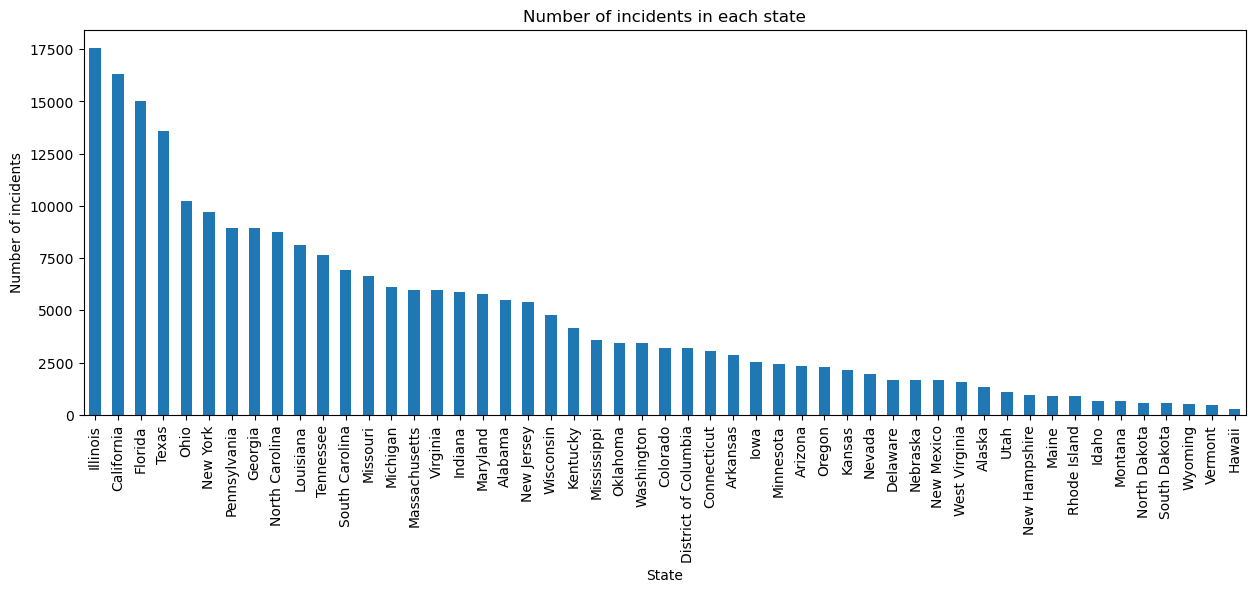

In [ ]:
# Visualize how many incidents happened in each state
incidents_data['state'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Number of incidents in each state')
plt.xlabel('State')
plt.ylabel('Number of incidents')

In [20]:
incidents_data.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [21]:
incidents_data.describe(include='all')

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
count,239677,239677,239677,223180,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,...,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000,158660,239351,141931
unique,2437,51,12898,198037,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136652,52,90
top,2017-01-01,Illinois,Chicago,2375 International Pkwy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,man shot,Shot - Wounded/Injured,Officer Involved Incident
freq,342,17556,10814,160,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,93926,13881
mean,NaN,NaN,NaN,NaN,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,...,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,...,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN


In [26]:
incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

### Date

In [76]:
# convert date column to datetime type
incidents_data['date'] = pd.to_datetime(incidents_data['date'])

Range data:  2013-01-01 00:00:00  -  2030-11-28 00:00:00


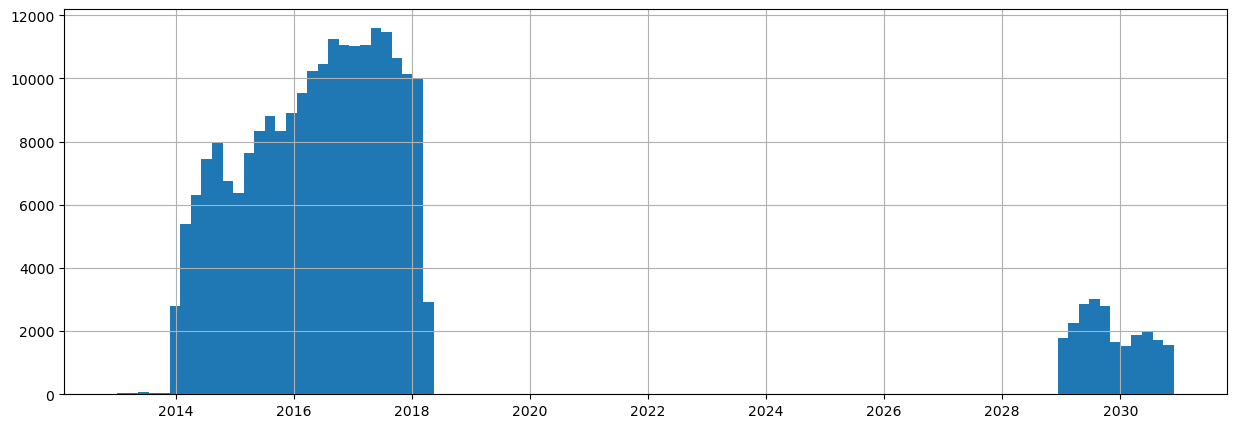

In [78]:
# plot range data
incidents_data['date'].hist(figsize=(15, 5), bins=100)
print('Range data: ', incidents_data['date'].min(), ' - ', incidents_data['date'].max())

Check on Congressional District type

In [29]:
# check if distrect float values are actually integers
incidents_data['congressional_district'].apply(lambda x: x.is_integer()).value_counts()

True     227733
False     11944
Name: congressional_district, dtype: int64

In [42]:
incidents_data['congressional_district'].isna().sum()

11944

In [43]:
# convert congressional district to integer if not null
incidents_data['congressional_district'] = incidents_data['congressional_district'].apply(lambda x: int(x) if not pd.isnull(x) else x)

In [49]:
incidents_data['congressional_district'] = incidents_data['congressional_district'].astype('Int64')

State House District

In [51]:
display(incidents_data['state_house_district'].apply(lambda x: x.is_integer()).value_counts())
print(incidents_data['state_house_district'].isna().sum())

True     200905
False     38772
Name: state_house_district, dtype: int64

38772


In [52]:
incidents_data['state_house_district'] = incidents_data['state_house_district'].astype('Int64')

In [90]:
incidents_data['state'].value_counts().values

array([17556, 16306, 15029, 13577, 10244,  9712,  8929,  8925,  8739,
        8103,  7626,  6939,  6631,  6136,  5981,  5949,  5852,  5798,
        5471,  5387,  4787,  4157,  3599,  3455,  3434,  3201,  3195,
        3067,  2842,  2517,  2408,  2328,  2286,  2145,  1952,  1685,
        1651,  1645,  1575,  1349,  1072,   964,   907,   895,   661,
         638,   573,   544,   494,   472,   289], dtype=int64)

In [97]:
# display map of USA with number of incidents in each state
import plotly.express as px
import numpy as np
"""fig = px.choropleth(locations=incidents_data['state'].value_counts().index,
                    locationmode="USA-states",
                    color=incidents_data['state'].value_counts().values,
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title='Number of incidents in each state')"""
color_scale = [(0, 'orange'), (1,'orange')]
fig = px.scatter_mapbox(color=np.ones(incidents_data.shape[0]), 
                        lat=incidents_data['latitude'], 
                        lon=incidents_data['longitude'],
                        color_continuous_scale=color_scale,
                        zoom=3, 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### State Senate District

In [53]:
display(incidents_data['state_senate_district'].apply(lambda x: x.is_integer()).value_counts())
print(incidents_data['state_senate_district'].isna().sum())

True     207342
False     32335
Name: state_senate_district, dtype: int64

32335


In [54]:
incidents_data['state_senate_district'] = incidents_data['state_senate_district'].astype('Int64')

In [55]:
incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  Int64  
 7   state_house_district       200905 non-null  Int64  
 8   state_senate_district      207342 non-null  Int64  
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

### Descrive district

In [61]:
incidents_data['congressional_district'].describe()

count    227733.0
mean     8.001265
std      8.480835
min           0.0
25%           2.0
50%           5.0
75%          10.0
max          53.0
Name: congressional_district, dtype: Float64

In [63]:
# check if congressional  district with same number are in the same state
incidents_data.groupby(['state', 'congressional_district']).size().sort_values(ascending=False)

state                 congressional_district
Illinois              7                         4720
Louisiana             2                         4001
Maryland              7                         3089
Illinois              1                         2894
Missouri              1                         2714
District of Columbia  1                         2644
Wisconsin             4                         2439
Virginia              3                         2394
Tennessee             9                         2337
Florida               5                         2273
Ohio                  11                        1902
Alabama               7                         1805
North Carolina        12                        1768
Indiana               7                         1733
Illinois              17                        1672
South Carolina        6                         1655
Massachusetts         7                         1603
California            13                        1590
G

In [65]:
# state house district == 901
incidents_data[incidents_data['state_house_district'] == 901].state

126777    New Hampshire
Name: state, dtype: object

In [72]:
# show all the unique state_house_district number in state = New Hampshire
inc = incidents_data[incidents_data['state'] == 'New Hampshire']['state_house_district'].unique()
# sort inc


<IntegerArray>
[<NA>,  618,  717,  513,  516,  602,  515,  514,  413,  517,  212,  813,  814,
  209,  623,    1,  601,  503,  724,  718,  521,  102,  622,   13,  512,  713,
  202,  510,  705,    6,  729,  603,  533,  805,  721,  720,  605,  608,  511,
  203,  801,   22,  624,  725,  901,    3,  727,  518,  726,  506,  530,  714,
  804,  716,  537,  201,  723,  615,  614,  411,  524,  808,  610,  809,  708,
  303,  709,  529,  811]
Length: 69, dtype: Int64

In [66]:
incidents_data.loc[126777]

date                                                                2017-10-15
state                                                            New Hampshire
city_or_county                                                        Grantham
address                                                                  NH-10
latitude                                                               43.5327
longitude                                                             -72.1398
congressional_district                                                       2
state_house_district                                                       901
state_senate_district                                                        8
participant_age1                                                           NaN
participant_age_group1                                               Adult 18+
participant_gender1                                                       Male
min_age_participants                                

## Poverty data
Contains information about the poverty percentage for each USA state and year.

In [ ]:
poverty_data.head()

,state,year,povertyPercentage
0,United States,2020,11.5
1,Alabama,2020,14.8
2,Alaska,2020,11.5
3,Arizona,2020,12.1
4,Arkansas,2020,15.8


In [ ]:
print('Number of entries: ', poverty_data.shape[0])
print('Numebr of columns: ', poverty_data.shape[1])

Number of entries:  884
Numebr of columns:  3


In [ ]:
# Check for missing values
poverty_data.isnull().sum()

state                 0
year                  0
povertyPercentage    52
dtype: int64

In [ ]:
# Check for duplicate entries
poverty_data.duplicated().sum()

0

In [ ]:
print('Range of years: ', poverty_data['year'].min(), poverty_data['year'].max())
print('Number of states: ', poverty_data['state'].nunique())

Range of years:  2004 2020
Number of states:  52


Text(0, 0.5, 'Poverty percentage (%)')

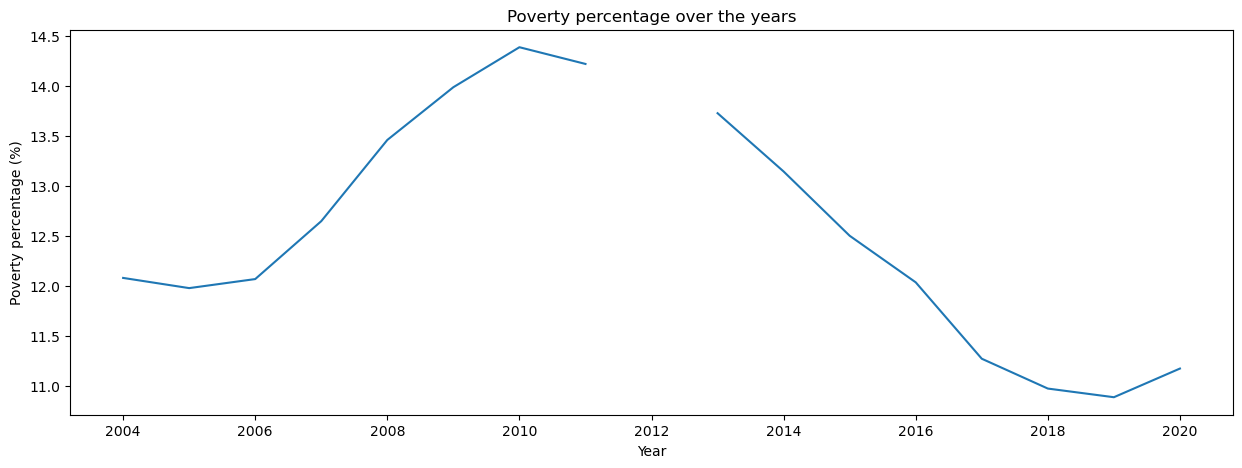

In [ ]:
# Visualize how poverty percentage changed over the years
poverty_data.groupby('year')['povertyPercentage'].mean().plot(kind='line', figsize=(15, 5))
plt.title('Poverty percentage over the years')
plt.xlabel('Year')
plt.ylabel('Poverty percentage (%)')

Text(0, 0.5, 'Poverty percentage (%)')

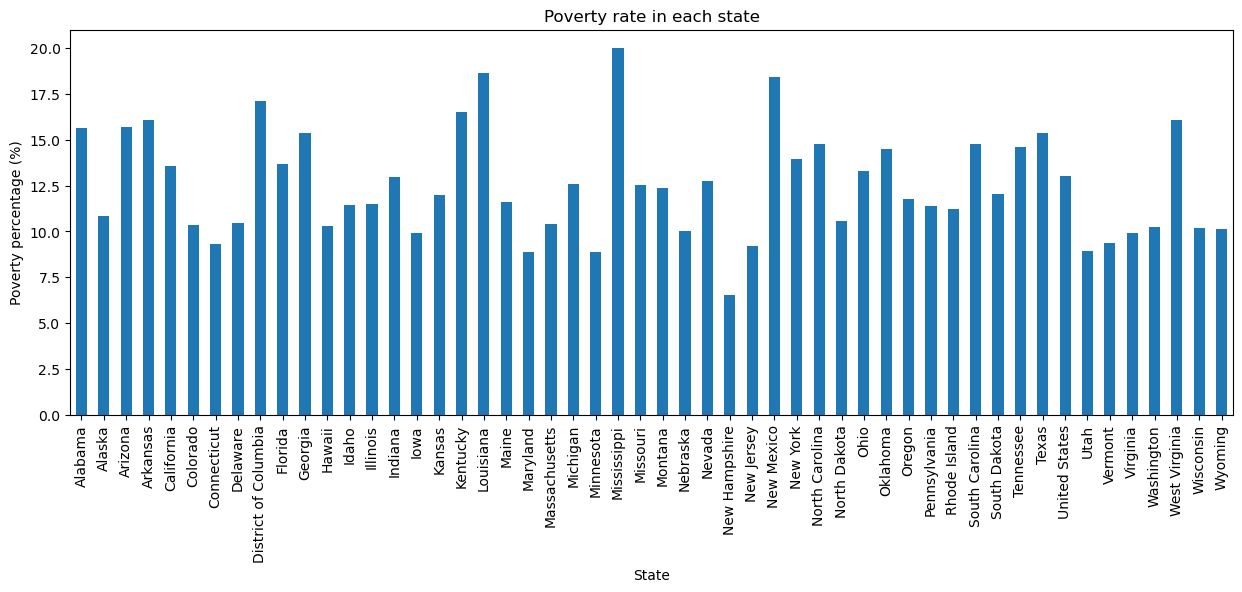

In [ ]:
# Visualize how poverty percentage changed in each state
poverty_data.groupby('state')['povertyPercentage'].mean().plot(kind='bar', figsize=(15, 5))
plt.title('Poverty rate in each state')
plt.xlabel('State')
plt.ylabel('Poverty percentage (%)')

## Congressional winner data
Contains information about the winner of the congressional elections in the USA, for each year, state and congressional district.

In [ ]:
congressional_winner_data.head()

,year,state,congressional_district,party,candidatevotes,totalvotes
0,1976,ALABAMA,1,REPUBLICAN,98257,157170
1,1976,ALABAMA,2,REPUBLICAN,90069,156362
2,1976,ALABAMA,3,DEMOCRAT,106935,108048
3,1976,ALABAMA,4,DEMOCRAT,141490,176022
4,1976,ALABAMA,5,DEMOCRAT,113553,113560


In [ ]:
print('Number of entries: ', congressional_winner_data.shape[0])
print('Numebr of columns: ', congressional_winner_data.shape[1])

Number of entries:  10441
Numebr of columns:  6


In [ ]:
# Check for missing values
congressional_winner_data.isnull().sum()

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64

In [ ]:
# Check for duplicate entries
congressional_winner_data.duplicated().sum()

0

In [ ]:
print('Range of years: ', congressional_winner_data['year'].min(), congressional_winner_data['year'].max())
print('Number of states: ', congressional_winner_data['state'].nunique())
print('Number of parties: ', congressional_winner_data['party'].nunique())
print('Parties: ', congressional_winner_data['party'].unique())

Range of years:  1976 2022
Number of states:  51
Number of parties:  6
Parties:  ['REPUBLICAN' 'DEMOCRAT' 'FOGLIETTA (DEMOCRAT)' 'DEMOCRATIC-FARMER-LABOR'
 'INDEPENDENT' 'INDEPENDENT-REPUBLICAN']


In [ ]:
print('Total number of total votes won by each party')
congressional_winner_data.groupby('party')['totalvotes'].sum()

Total number of total votes won by each party


party
DEMOCRAT                   1071081268
DEMOCRATIC-FARMER-LABOR      15659480
FOGLIETTA (DEMOCRAT)           155451
INDEPENDENT                   2421494
INDEPENDENT-REPUBLICAN         615754
REPUBLICAN                 1078059049
Name: totalvotes, dtype: int64

Text(0, 0.5, 'Total votes')

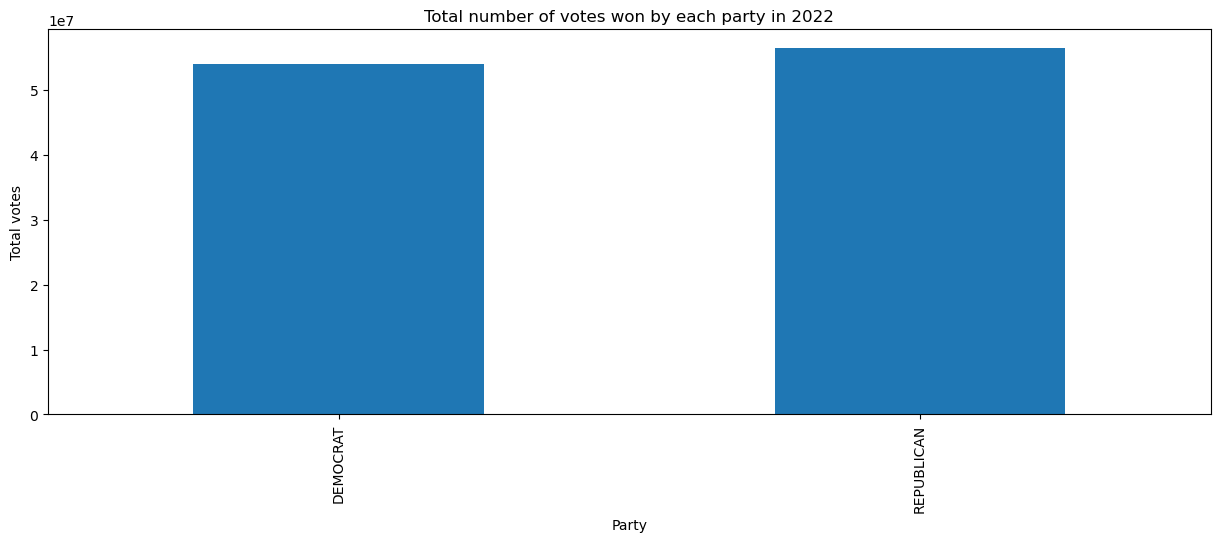

In [ ]:
# Visualize how many votes each party won in 2022
congressional_winner_data[congressional_winner_data['year'] == 2022].groupby('party')['totalvotes'].sum().plot(kind='bar', figsize=(15, 5))
plt.title('Total number of votes won by each party in 2022')
plt.xlabel('Party')
plt.ylabel('Total votes')

C:\Users\giuli\AppData\Local\Temp\ipykernel_16212\190244799.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  congressional_winner_data[congressional_winner_data['year'] == 2022][congressional_winner_data['party'] == 'DEMOCRAT'].groupby('state')['totalvotes'].sum().plot(kind='bar', figsize=(15, 5))


Text(0, 0.5, 'Total votes')

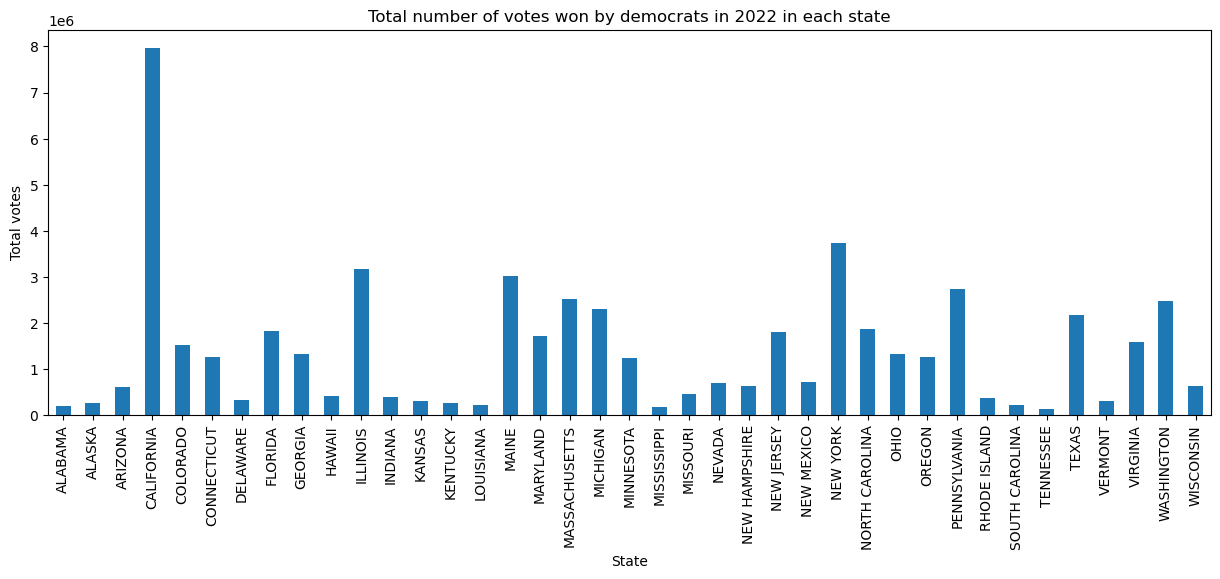

In [ ]:
# Visualize how many votes democrats won in 2022 in each state
congressional_winner_data[congressional_winner_data['year'] == 2022][congressional_winner_data['party'] == 'DEMOCRAT'].groupby('state')['totalvotes'].sum().plot(kind='bar', figsize=(15, 5))
plt.title('Total number of votes won by democrats in 2022 in each state')
plt.xlabel('State')
plt.ylabel('Total votes')

C:\Users\giuli\AppData\Local\Temp\ipykernel_16212\1940389131.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  congressional_winner_data[congressional_winner_data['year'] == 2022][congressional_winner_data['party'] == 'REPUBLICAN'].groupby('state')['totalvotes'].sum().plot(kind='bar', figsize=(15, 5))


Text(0, 0.5, 'Total votes')

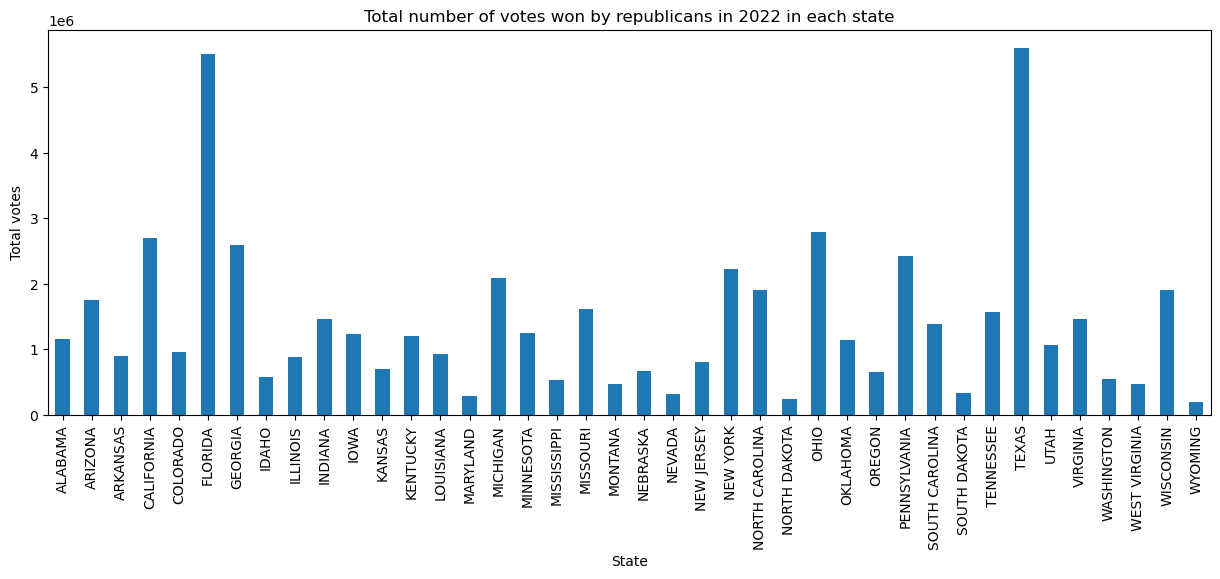

In [ ]:
# Visualize how many votes republicans won in 2022 in each state
congressional_winner_data[congressional_winner_data['year'] == 2022][congressional_winner_data['party'] == 'REPUBLICAN'].groupby('state')['totalvotes'].sum().plot(kind='bar', figsize=(15, 5))
plt.title('Total number of votes won by republicans in 2022 in each state')
plt.xlabel('State')
plt.ylabel('Total votes')